In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
import time
from tkinter import *

In [2]:
def make_cluster(x, y, c, s, num):
    
    for i in range(num):
        x.append(np.random.normal(loc=c[0], scale=s[0]))
        y.append(np.random.normal(loc=c[1], scale=s[1]))
        
    return None

In [3]:
def dist(a, b):
    return ((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2) ** (0.5)

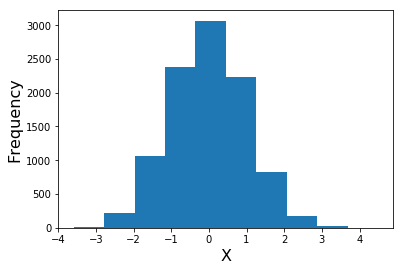

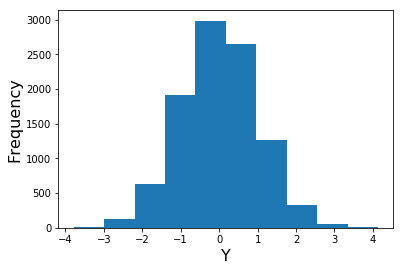

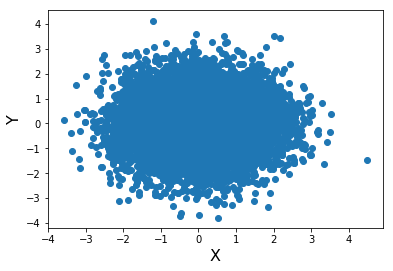

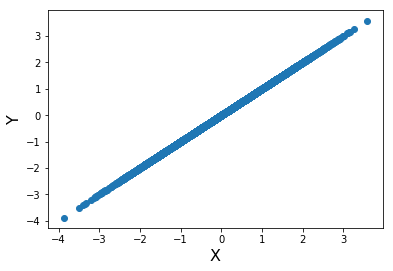

In [7]:
x = []
y = []
make_cluster(x, y, (0, 0), (1, 1), 10000)
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=16)
plt.hist(x)
plt.xlabel("X")
plt.ylabel("Frequency")
plt.show()
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.hist(y)
plt.show()
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
x = []
y = []
for i in range(10000):
    tmp = np.random.normal(0, 1, 1)
    x.append(tmp)
    y.append(tmp)
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

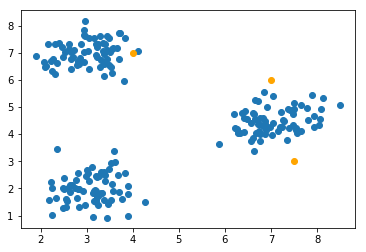

In [8]:
x=[]
y=[]
c_x = [4, 7.5, 7]
c_y = [7, 3, 6]
make_cluster(x, y, (3,2), (0.5, 0.5), 70)
make_cluster(x, y, (3,7), (0.5, 0.5), 70)
make_cluster(x, y, (7,4.5), (0.5, 0.5), 70)
plt.scatter(x, y)
plt.scatter(c_x, c_y, c="orange")

plt.show()

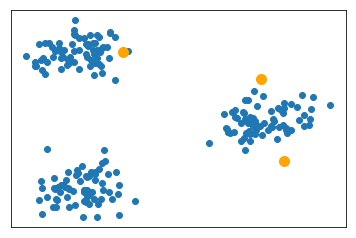

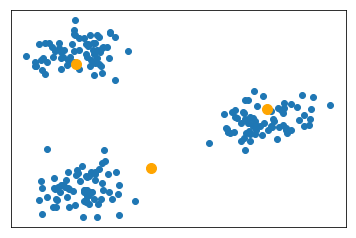

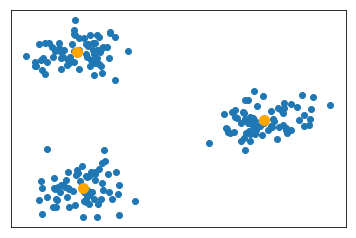

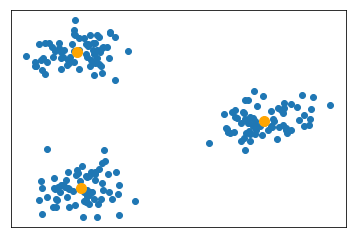

[[[1, 2, 11, 17, 36, 42, 49, 55, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], [0, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 140, 141, 142, 143, 146, 148, 150, 151, 153, 154, 155, 160, 162, 163, 164, 165, 167, 168, 170, 171, 173, 176, 179, 181, 182, 184, 185, 186, 187, 189, 190, 192, 195, 197, 199, 201, 205, 208], [144, 145, 147, 149, 152, 156, 157, 158, 159, 161, 166, 169, 172, 174, 175, 177, 178, 180, 183, 188, 191, 193, 194, 196, 198, 200, 202, 203, 204, 206, 207, 209]], [[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 8

In [9]:
# Traditional k-means snapshots
center_x = copy.deepcopy(c_x)
center_y = copy.deepcopy(c_y)
old_centers_x = []
old_centers_y = []
all_x_centers = []
all_y_centers = []
groups = []
counter = 1

while (not (set(center_x) == set(old_centers_x) and set(center_y) == set(old_centers_y))):
    
    all_x_centers.append(copy.deepcopy(center_x))
    all_y_centers.append(copy.deepcopy(center_y))
    
    old_centers_x = copy.deepcopy(center_x)
    old_centers_y = copy.deepcopy(center_y)
    
    plt.scatter(x, y)
    plt.scatter(center_x, center_y, c="orange", s=100)
    clusters = [[] for i in range(len(center_x))]
    for i in range(len(x)):
        closest = 0
        for j in range(len(center_x)):
            old_dist = dist((x[i], y[i]), (center_x[closest], center_y[closest]))
            new_dist = dist((x[i], y[i]), (center_x[j], center_y[j]))
            if  new_dist < old_dist:
                closest = j
        clusters[closest].append(i)
    plt.xticks([])
    plt.yticks([])
    plt.savefig("k" + str(counter) + ".png")
    counter = counter + 1
    groups.append(copy.deepcopy(clusters))
    plt.show()
    
    for i in range(len(clusters)):
        new_x = 0
        new_y = 0
        for j in clusters[i]:
            new_x = new_x + x[j]
            new_y = new_y + y[j]
        center_x[i] = new_x * 1.0 / len(clusters[i])
        center_y[i] = new_y * 1.0 / len(clusters[i])

In [31]:
WIDTH = 800
HEIGHT = 600

scale_x = WIDTH / 10.0
scale_y = HEIGHT / 10.0

tk = Tk()
canvas = Canvas(tk, width=WIDTH, height=HEIGHT)
tk.title("Drawing")
canvas.pack()

for i in range(len(x)):
    canvas.create_oval(x[i] * scale_x, HEIGHT - y[i] * scale_y - 10, x[i] * scale_x + 10, HEIGHT - y[i] * scale_y, fill="blue")

centers = []
lines = []
    
for i in range(len(all_x_centers[0])):
    ball = canvas.create_oval(all_x_centers[0][i] * scale_x, HEIGHT - all_y_centers[0][i] * scale_y - 10, all_x_centers[0][i] * scale_x + 10, HEIGHT - all_y_centers[0][i] * scale_y, fill="orange")
    centers.append(ball)

tk.update()
time.sleep(5)
tk.update()
time.sleep(10)
    
for i in range(len(all_x_centers)):
    if ((i + 1) == len(all_x_centers)):
        time.sleep(3)
    else:
        for j in range(len(groups[i])):
            for k in groups[i][j]:
                line = canvas.create_line(all_x_centers[i][j] * scale_x + 5, HEIGHT - all_y_centers[i][j] * scale_y - 5, x[k] * scale_x + 5, HEIGHT - y[k] * scale_y - 5)
                lines.append(line)
        curr_x = np.array(all_x_centers[i]) * scale_x
        curr_y = np.array(all_y_centers[i]) * scale_y
        next_x = np.array(all_x_centers[i + 1]) * scale_x
        next_y = np.array(all_y_centers[i + 1]) * scale_y
        v_x = (next_x - curr_x) / 50.0
        v_y = (next_y - curr_y) / -50.0
        tk.update()
        time.sleep(1.5)
        for j in lines:
            canvas.delete(j)
        for j in range(50):
            for k in range(len(centers)):
                canvas.move(centers[k], v_x[k], v_y[k])
            tk.update()
            time.sleep(0.002)
    time.sleep(1)
'''
ball = canvas.create_oval(10, 10, 60, 60, fill="orange")
xspeed = 4
yspeed = 5

while True:
    canvas.move(ball, xspeed, yspeed)
    pos = canvas.coords(ball)
    if pos[3] >= HEIGHT or pos[1] <= 0:
        yspeed = -1 * yspeed
    if pos[2] >= WIDTH or pos[0] <= 0:
        xspeed = -1 * xspeed
    tk.update()
    time.sleep(0.1)'''
    
tk.mainloop()

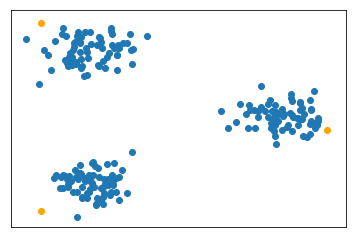

In [123]:
plt.scatter(x,y)
plt.scatter([2, 2, 7.9], [8, 1, 4], c="orange")
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
def distortion(index, lst, x, y):
    
    distance = 0
    
    for i in lst:
        distance = distance + dist((x[i], y[i]), (x[lst[index]], y[lst[index]]))
        
    return distance

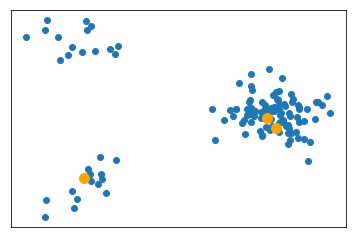

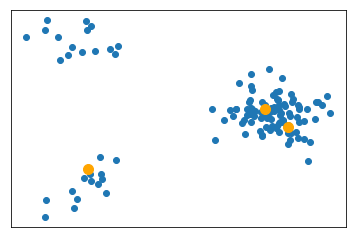

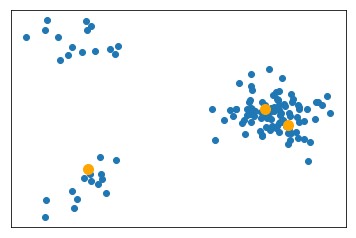

In [19]:
# Centroid constrained k-means
x = []
y = []
make_cluster(x, y, (3,2), (0.5, 0.5), 15)
make_cluster(x, y, (3,7), (0.5, 0.5), 15)
make_cluster(x, y, (7,4.5), (0.5, 0.5), 100)

c_x = []
c_y = []
c_x.append(x[0])
c_y.append(y[0])
c_x.append(x[80])
c_y.append(y[80])
c_x.append(x[90])
c_y.append(y[90])

all_x_centers = []
all_y_centers = []

center_x = copy.deepcopy(c_x)
center_y = copy.deepcopy(c_y)
old_centers_x = []
old_centers_y = []

groups = []

while (not (set(center_x) == set(old_centers_x) and set(center_y) == set(old_centers_y))):
    
    all_x_centers.append(copy.deepcopy(center_x))
    all_y_centers.append(copy.deepcopy(center_y))
    
    old_centers_x = copy.deepcopy(center_x)
    old_centers_y = copy.deepcopy(center_y)
    
    plt.scatter(x, y)
    plt.scatter(center_x, center_y, c="orange", s=100)
    clusters = [[] for i in range(len(center_x))]
    for i in range(len(x)):
        closest = 0
        for j in range(len(center_x)):
            old_dist = dist((x[i], y[i]), (center_x[closest], center_y[closest]))
            new_dist = dist((x[i], y[i]), (center_x[j], center_y[j]))
            if  new_dist < old_dist:
                closest = j
        clusters[closest].append(i)
    groups.append(copy.deepcopy(clusters))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    for i in range(len(clusters)):
        min_val = np.inf
        index = None
        for j in range(len(clusters[i])):
            tmp = distortion(j, clusters[i], x, y)
            if tmp < min_val:
                min_val = tmp
                index = j
        center_x[i] = x[clusters[i][index]]
        center_y[i] = y[clusters[i][index]]


In [22]:
WIDTH = 800
HEIGHT = 600

scale_x = WIDTH / 10.0
scale_y = HEIGHT / 10.0

tk = Tk()
canvas = Canvas(tk, width=WIDTH, height=HEIGHT)
tk.title("Drawing")
canvas.pack()

for i in range(len(x)):
    canvas.create_oval(x[i] * scale_x, HEIGHT - y[i] * scale_y - 10, x[i] * scale_x + 10, HEIGHT - y[i] * scale_y, fill="blue")

centers = []
lines = []
    
for i in range(len(all_x_centers[0])):
    ball = canvas.create_oval(all_x_centers[0][i] * scale_x, HEIGHT - all_y_centers[0][i] * scale_y - 10, all_x_centers[0][i] * scale_x + 10, HEIGHT - all_y_centers[0][i] * scale_y, fill="orange")
    centers.append(ball)

tk.update()
time.sleep(5)
tk.update()
time.sleep(8)
    
for i in range(len(all_x_centers)):
    if ((i + 1) == len(all_x_centers)):
        time.sleep(3)
    else:
        for j in range(len(groups[i])):
            for k in groups[i][j]:
                line = canvas.create_line(all_x_centers[i][j] * scale_x + 5, HEIGHT - all_y_centers[i][j] * scale_y - 5, x[k] * scale_x + 5, HEIGHT - y[k] * scale_y - 5)
                lines.append(line)
        curr_x = np.array(all_x_centers[i]) * scale_x
        curr_y = np.array(all_y_centers[i]) * scale_y
        next_x = np.array(all_x_centers[i + 1]) * scale_x
        next_y = np.array(all_y_centers[i + 1]) * scale_y
        v_x = (next_x - curr_x) / 50.0
        v_y = (next_y - curr_y) / -50.0
        tk.update()
        time.sleep(1.5)
        for j in lines:
            canvas.delete(j)
        for j in range(50):
            for k in range(len(centers)):
                canvas.move(centers[k], v_x[k], v_y[k])
            tk.update()
            time.sleep(0.002)
    time.sleep(1)
'''
ball = canvas.create_oval(10, 10, 60, 60, fill="orange")
xspeed = 4
yspeed = 5

while True:
    canvas.move(ball, xspeed, yspeed)
    pos = canvas.coords(ball)
    if pos[3] >= HEIGHT or pos[1] <= 0:
        yspeed = -1 * yspeed
    if pos[2] >= WIDTH or pos[0] <= 0:
        xspeed = -1 * xspeed
    tk.update()
    time.sleep(0.1)'''
    
tk.mainloop()